In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt

1 Загрузите файл HR.csv в pandas dataframe - 5 баллов

In [50]:
data = pd.read_csv('HR.csv', sep=',', na_values = ['?'])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2 Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение) - 10 баллов

1 вариант

In [3]:
data.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


2 вариант
выбираю только количественные переменные и считаю основные статистики

In [3]:
sorted_data = data.iloc[:, 0:8]
mean = sorted_data.mean()
median = sorted_data.median()
min = sorted_data.min()
max = sorted_data.max()
std = sorted_data.std()
data_2 = pd.concat([min, max, mean, median, std], axis=1)
data_2.columns = ['min', 'max', 'mean', 'median', 'std']
data_2.head()

,min,max,mean,median,std
satisfaction_level,0.09,1.0,0.612834,0.64,0.248631
last_evaluation,0.36,1.0,0.716102,0.72,0.171169
number_project,2.00,7.0,3.803054,4.00,1.232592
average_montly_hours,96.00,310.0,201.050337,200.00,49.943099
time_spend_company,2.00,10.0,3.498233,3.00,1.460136


мода

In [6]:
mode = sorted_data.mode()
mode.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN


3 Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.
Определите две самые скоррелированные и две наименее скоррелированные переменные - 10 баллов

проверка данных на пропуски

In [7]:
sorted_data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dtype: int64

корреляционная матрица

In [8]:

sorted_data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

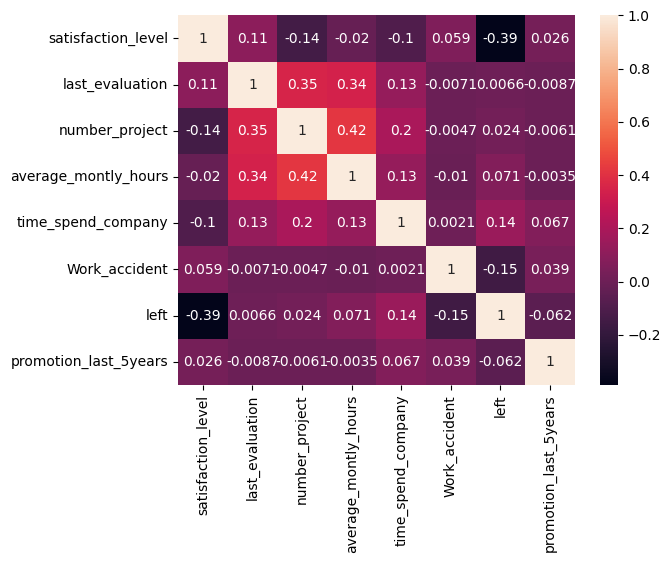

In [8]:
import seaborn as sns
sns.heatmap(sorted_data.corr(), annot=True)

две самые скоррелированные переменные: number_project и average_montly_hours
две наименее скоррелированные переменные: satisfaction_level и left

4 Рассчитайте сколько сотрудников работает в каждом департаменте - 5 баллов

In [9]:
persons = data.groupby('department')['satisfaction_level'].count().reset_index(name='person')
persons.head(30)

,department,person
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


5 Показать распределение сотрудников по зарплатам - 5 баллов

In [11]:
salary = data.groupby('salary')['satisfaction_level'].count()
salary.head(30)

salary
high      1237
low       7316
medium    6446
Name: satisfaction_level, dtype: int64

<Axes: title={'center': 'Distribution of employees by salary'}, xlabel='salary', ylabel='numder of employee'>

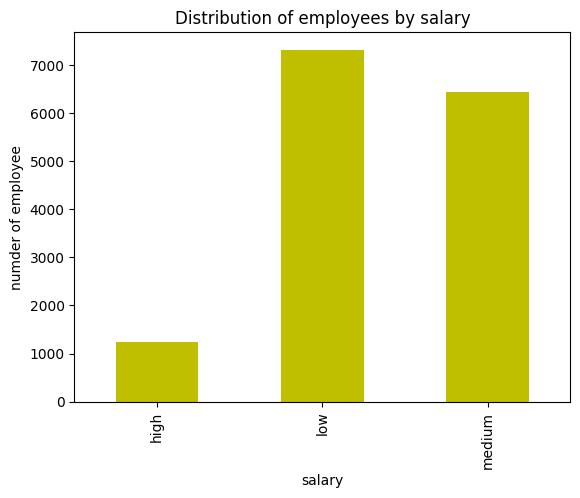

In [30]:

salary.plot(kind="bar", color='y', title='Distribution of employees by salary', xlabel='salary', ylabel='numder of employees')

6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности - 5 баллов

In [58]:
salary_dep = data.groupby('department')[['salary']].value_counts().reset_index()
salary_dep.columns = ['department','salary','number of employees']
salary_dep.head()

,department,salary,number of employees
0,IT,low,609
1,IT,medium,535
2,IT,high,83
3,RandD,medium,372
4,RandD,low,364


Text(0.5, 1.0, 'Distribution of employees by salary in each demartment')

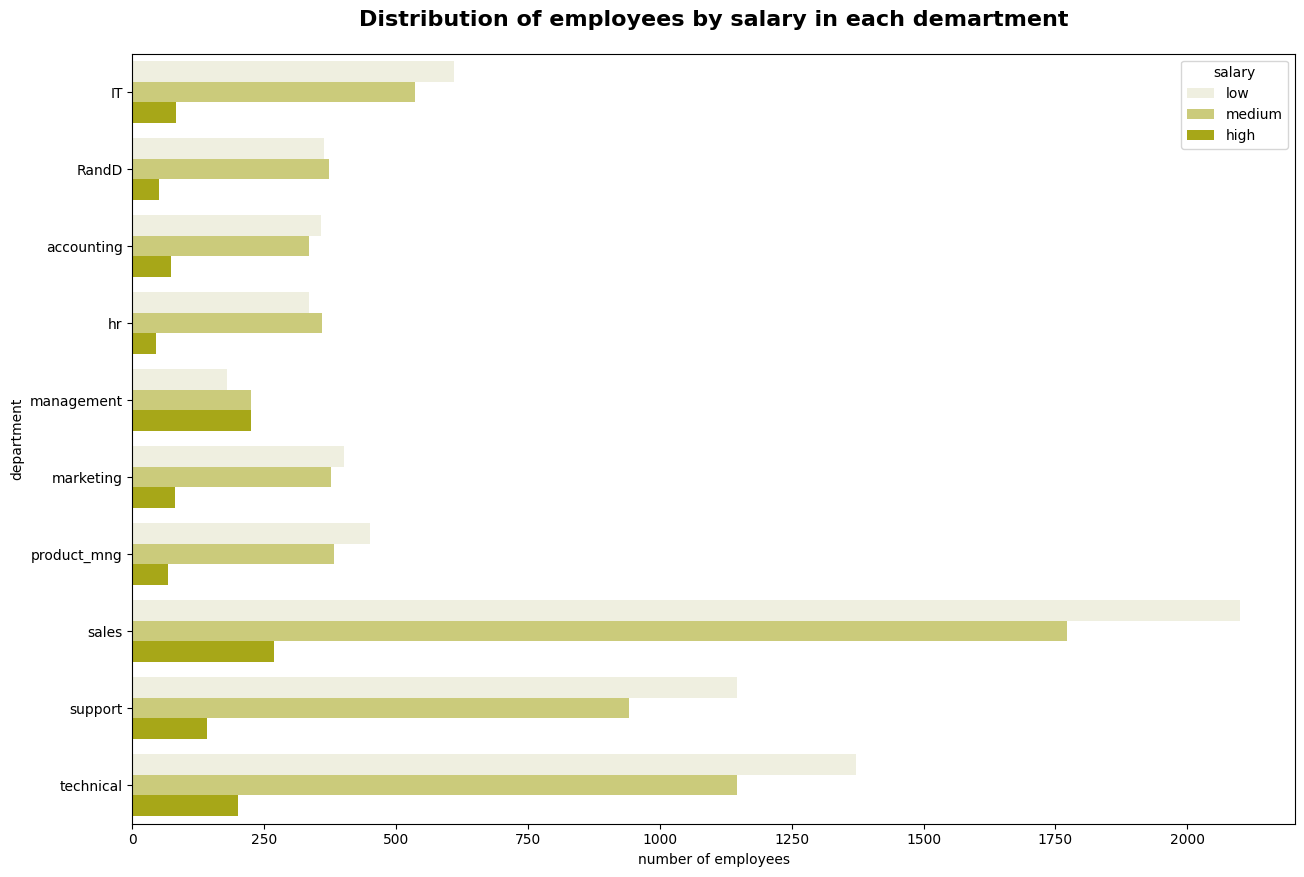

In [61]:
sns.barplot(data=salary_dep,
            y='department', 
            x='number of employees', 
            hue='salary',
            color='y')
plt.title('Distribution of employees by salary in each demartment', fontsize=16, fontweight='bold', pad=20)

7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
- 10 баллов

вариант 1

In [12]:
salary_mean = data.groupby('salary')[['average_montly_hours']].mean().round(2)
salary_mean.head(30)

,average_montly_hours
salary,
high,199.87
low,201.00
medium,201.34


сотрудники с высоким окладом в среднем проводят на работе столько же времени, как и сотрудники с низким окладом

вариант 2: проверим гипотезу при уровне значимости 0,05

(array([0.00095783, 0.00114939, 0.00229879, 0.00172409, 0.00268192,
        0.00134096, 0.00076626, 0.00249035, 0.00383131, 0.00689637,
        0.00632167, 0.00593854, 0.00708793, 0.0067048 , 0.00651324,
        0.00900359, 0.00651324, 0.00478914, 0.00804576, 0.00842889,
        0.00363975, 0.00632167, 0.00957829, 0.00383131, 0.00363975,
        0.00536384, 0.00593854, 0.00881202, 0.00593854, 0.00459758,
        0.00651324, 0.0067048 , 0.00574697, 0.00632167, 0.00517228,
        0.00498071, 0.0061301 , 0.00689637, 0.00766263, 0.00632167,
        0.00747106, 0.00651324, 0.00306505, 0.00191566, 0.00134096,
        0.00210722, 0.00038313, 0.00019157, 0.        , 0.00038313]),
 array([ 96.  , 100.22, 104.44, 108.66, 112.88, 117.1 , 121.32, 125.54,
        129.76, 133.98, 138.2 , 142.42, 146.64, 150.86, 155.08, 159.3 ,
        163.52, 167.74, 171.96, 176.18, 180.4 , 184.62, 188.84, 193.06,
        197.28, 201.5 , 205.72, 209.94, 214.16, 218.38, 222.6 , 226.82,
        231.04, 235.26, 239.48

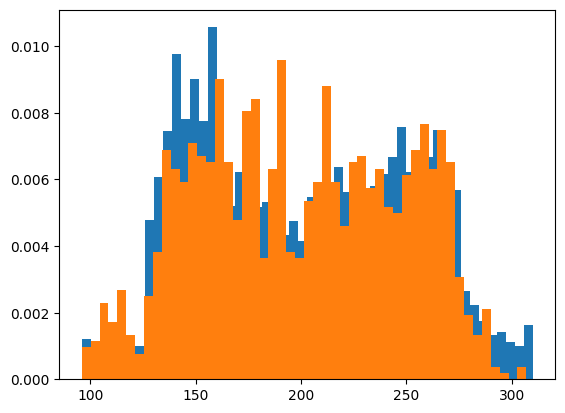

In [20]:
high_salary = data.loc[data['salary'] == 'high']['average_montly_hours']
low_salary = data.loc[data['salary'] == 'low']['average_montly_hours']
plt.hist(low_salary, bins=50, density=True)
plt.hist(high_salary, bins=50, density=True)


In [22]:
import scipy.stats as stats
t, p = stats.ttest_ind(high_salary, low_salary)
t, p

(-0.7288680398062308, 0.4661023478267259)

Отвергаем гипотезу, что зарплата зависит от рабочего времени

8 Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): 
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

- 10 баллов

отсортированы данные по уволившимся сотрудникам и расчитаны показатели

In [63]:
data_left = data.loc[(data['left'] == 1)]
all_person = data_left['promotion_last_5years'].count()
promotion_person = data_left.query('promotion_last_5years == 1')
count_person = promotion_person['promotion_last_5years'].count()
persent = round(100*count_person/all_person,2)
mean_satisfaction = data_left['satisfaction_level'].mean()
mean_project = data_left['number_project'].mean()
print('Доля сотрудников с повышением за последние 5 лет ', persent)
print('Средняя степень удовлетворенности ', mean_satisfaction)
print('Среднее количество проектов ', mean_project)


Доля сотрудников с повышением за последние 5 лет  0.53
Средняя степень удовлетворенности  0.4400980117614114
Среднее количество проектов  3.8555026603192384


отсортированы данные по неуволившимся сотрудникам и расчитаны показатели

In [64]:
data_not_left = data.loc[(data['left'] == 0)]
all_person = data_not_left['promotion_last_5years'].count()
promotion_person = data_not_left.query('promotion_last_5years == 1')
count_person = promotion_person['promotion_last_5years'].count()
persent = round(100*count_person/all_person,2)
mean_satisfaction = data_not_left['satisfaction_level'].mean()
mean_project = data_not_left['number_project'].mean()
print('Доля сотрудников с повышением за последние 5 лет ', persent)
print('Средняя степень удовлетворенности ', mean_satisfaction)
print('Среднее количество проектов ', mean_project)

Доля сотрудников с повышением за последние 5 лет  2.63
Средняя степень удовлетворенности  0.666809590479524
Среднее количество проектов  3.786664333216661


9 Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
Оценить качество модели на тестовой выборки - 20 баллов

In [66]:
data_LDA = data.iloc[:, 0:8]
target = data.left

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_LDA, target, train_size=0.3, random_state = 42)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_train)
lda = LinearDiscriminantAnalysis()
lda.fit(x_scaled, y_train)
lda.predict(X_test)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

/Users/Anastasiya/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
/Users/Anastasiya/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


,left,Unnamed 0
6723,0.0,0.0
6473,0.0,1.0
4679,0.0,0.0
862,1.0,1.0
7286,0.0,0.0
...,...,...
7997,0.0,0.0
4276,0.0,0.0
14622,1.0,NaN
12802,0.0,NaN


In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

/Users/Anastasiya/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


1.0

Модель точная

10 Загрузить jupyter notebook с решение на github и прислать ссылку - 5 баллов

Итого - максимум 85 баллов
Для зачета необходимо набрать минимум 55